# Rock Paper Scissors Model Training
---


In [1]:
import os
import keras_preprocessing

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

Dataset has been downloaded from Coursera.

The classes are arranged alphabetically ==> ["PAPER", "ROCK", "SCISSORS"]

In [2]:
TRAINING_DIR = "./rps-train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "./rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [3]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [5]:
model.compile(
    loss = 'categorical_crossentropy', 
    optimizer='rmsprop', 
    metrics=['acc']
)

In [6]:
history = model.fit(
    train_generator, 
    epochs=25, 
    steps_per_epoch=20, 
    validation_data = validation_generator, 
    verbose = 1, 
    validation_steps=3
)

Epoch 1/25
20/20 [==============================] - 71s 4s/step - loss: 1.7539 - acc: 0.3520 - val_loss: 1.0897 - val_acc: 0.3333
Epoch 2/25
20/20 [==============================] - 74s 4s/step - loss: 1.0962 - acc: 0.3865 - val_loss: 1.0036 - val_acc: 0.4194
Epoch 3/25
20/20 [==============================] - 75s 4s/step - loss: 1.9419 - acc: 0.4587 - val_loss: 1.0547 - val_acc: 0.3468
Epoch 4/25
20/20 [==============================] - 74s 4s/step - loss: 0.9955 - acc: 0.5024 - val_loss: 0.8828 - val_acc: 0.7070
Epoch 5/25
20/20 [==============================] - 74s 4s/step - loss: 0.9747 - acc: 0.5623 - val_loss: 0.7751 - val_acc: 0.8602
Epoch 6/25
20/20 [==============================] - 77s 4s/step - loss: 0.8923 - acc: 0.5845 - val_loss: 0.9693 - val_acc: 0.5054
Epoch 7/25
20/20 [==============================] - 79s 4s/step - loss: 0.8263 - acc: 0.6417 - val_loss: 0.4918 - val_acc: 0.8925
Epoch 8/25
20/20 [==============================] - 75s 4s/step - loss: 0.8335 - acc: 0.67

In [7]:
model.save("RockPaperScissorsModel.h5")

Always a good measure to plot your data to check the accuracy progress!

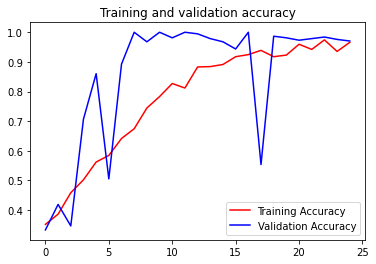

<Figure size 432x288 with 0 Axes>

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()